In [ ]:
pip install kagglehub

In [ ]:
#Importar los datos para el modelo
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'alzheimers-disease-dataset' dataset.
Path to dataset files: /kaggle/input/alzheimers-disease-dataset


In [ ]:
import os

#Ruta de los datos
db_path = os.path.join("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")

In [ ]:
#Testeo de datos, registros e información del CSV
import pandas as pd

data = pd.read_csv(db_path)
print(data.head())
print("------------------------------------------------------------------")
print(data.info())

   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0     

In [ ]:
#Organizar los datos
import numpy as np
from sklearn.preprocessing import StandardScaler

print(data.columns) # Print column names to debug

x = data.drop(["PatientID", "Diagnosis", "DoctorInCharge"], axis = 1) #Eliminar la columna del resultado
                                                         #Eliminar la columna del doctor y del ID del paciente ya que no es de relevancia para los datos de entrada
y = data["Diagnosis"] #Etiqueta para dichos datos

#convertir a numpy
X = x.values
Y = y.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X[:5])
print("---------------------------------------------")
print(X_scaled[:5])

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')
[[7.30000000e+01 0.00000000e+00 0.00000000e+00 2.00000000e+00
  2.29277492e+01 0.00000000e+00 1.32972177e+01 6.32711247e+00
  1.34721431e+00 9.02567867e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.42000000e+02 7.20000000e+01 2.42366840e+02 5.61508970e+01
  3.36825635e+01 1.6

In [ ]:
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf

#fijamos un valor de semilla aleatorio fijo para poder probar el modelo después con otros parámetros iniciales pero con ajuste diferente en la red
seed = 42 #valor aleatorio predefinido por defecto
random.seed(seed)
np.random.seed(42)
tf.random.set_seed(42)

X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=seed)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=seed)




In [ ]:
#Verificar etiquetas del dataset
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(1389), np.int64(1): np.int64(760)}


In [ ]:
import tensorflow as tf

#Construcción del modelo

model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="relu", use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="relu", use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation="relu", use_bias=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation="sigmoid", use_bias=True),
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), #Gradiente descendente para ajustar los pesos de la red
    loss = "binary_crossentropy", #Entropía cruzada binaria ya que el target Y es 0 o 1
    metrics = ["accuracy"]
)

In [ ]:
training = model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5311 - loss: 0.8170
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5411 - loss: 0.7955
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5520 - loss: 0.7760
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5601 - loss: 0.7579
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5667 - loss: 0.7413
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5769 - loss: 0.7260
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5904 - loss: 0.7119
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6057 - loss: 0.6988
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6112 - loss: 0.6865
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6196 - loss: 0.6751
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6268 - loss: 0.6644
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy:

In [ ]:
#Evaluacion testeo
model.predict(X_test, batch_size=32)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.42015243],
       [0.96274835],
       [0.11366344],
       [0.06669076],
       [0.7270636 ],
       [0.02474637],
       [0.16603318],
       [0.08825628],
       [0.1541375 ],
       [0.7139866 ],
       [0.3087258 ],
       [0.13628034],
       [0.8976973 ],
       [0.17974156],
       [0.9873635 ],
       [0.9794323 ],
       [0.43323234],
       [0.5707534 ],
       [0.22225541],
       [0.68776   ],
       [0.07271808],
       [0.12214956],
       [0.8111799 ],
       [0.3949173 ],
       [0.02276999],
       [0.82210755],
       [0.6531424 ],
       [0.19577281],
       [0.6062115 ],
       [0.13583067],
       [0.22130314],
       [0.8309489 ],
       [0.60902953],
       [0.144646  ],
       [0.22780892],
       [0.12487001],
       [0.12752685],
       [0.4457661 ],
       [0.12839328],
       [0.03052166],
       [0.8450219 ],
       [0.9667116 ],
       [0.37788066],
       [0.07315413],
       [0.99861205],
       [0.09149183],
       [0.88813865],
       [0.268

In [ ]:
#Evaluación modelo
model.fit(
  X_train, Y_train, shuffle=True, epochs=100, batch_size=32, validation_data=(X_val, Y_val)
)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8666 - loss: 0.3390 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8694 - loss: 0.3376 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8697 - loss: 0.3362 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8697 - loss: 0.3348 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3334 - val_accuracy: 0.7547 - val_loss: 0.5230
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3320 - val_accuracy: 0.7609 - val_loss: 0.5230
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.3306 - val_accuracy: 0.7609 - val_loss: 0.5230
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8724 - loss: 0.3293 - val_accuracy: 0.7609 - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


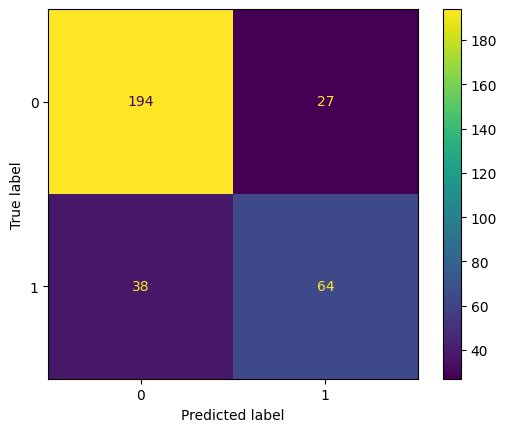

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

# convertir a 0/1 según un umbral (normalmente 0.5)
y_pred = (y_pred_proba > 0.5).astype("int32")


cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       221
           1       0.70      0.63      0.66       102

    accuracy                           0.80       323
   macro avg       0.77      0.75      0.76       323
weighted avg       0.79      0.80      0.80       323

